## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import systemcheck

C:\Users\yamsa\OneDrive\Desktop\emergency ward rush
everything is checked.. system okay


## Importing the training set

In [2]:
dataset_train = pd.read_csv('yashoda_group_Train.csv')

In [3]:
dataset_train

,Date,average patient
0,01-03-2012,325.25
1,01-04-2012,331.27
2,01-05-2012,329.83
3,01-06-2012,328.34
4,01-09-2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1258 non-null   object 
 1   average patient  1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [5]:
dataset_train.isna().sum()

Date               0
average patient    0
dtype: int64

In [6]:
dataset_train.describe()

,average patient
count,1258.000000
mean,533.709833
std,151.904442
min,279.120000
25%,404.115000
50%,537.470000
75%,654.922500
max,816.680000


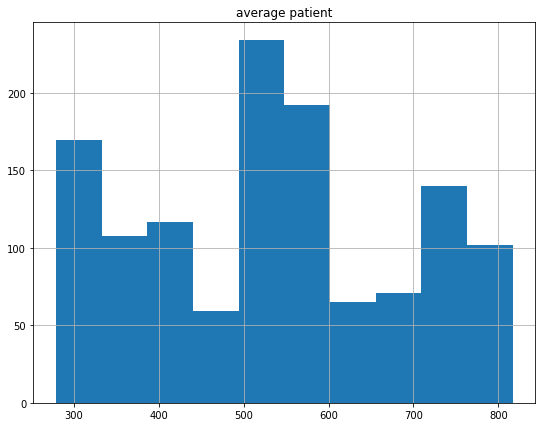

In [7]:
dataset_train.hist(figsize = (9,7))
plt.show()

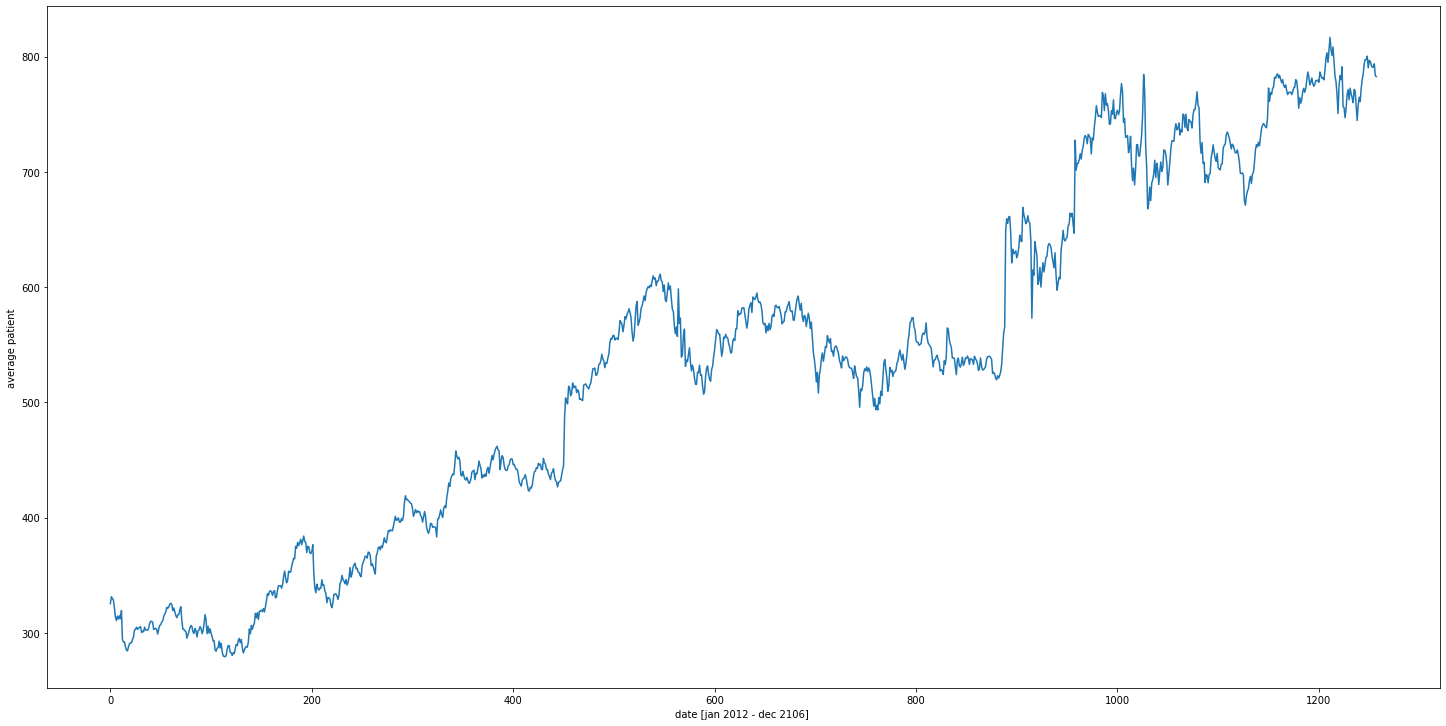

In [8]:
plt.figure(figsize=(20,10))
plt.plot(dataset_train['average patient'])
plt.tight_layout()
plt.xlabel("date [jan 2012 - dec 2106] ")
plt.ylabel("average patient")
plt.show()

In [9]:
training_set = dataset_train.iloc[:,1].values

In [10]:
training_set

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

## Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set.reshape(-1, 1))

In [12]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
training_set_scaled[0:60,0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

## Creating a data structure with 60 timesteps and 1 output

In [14]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [16]:
X_train.shape

(1198, 60)

In [17]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [18]:
y_train.shape

(1198,)

## Reshaping

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [21]:
X_train.shape

(1198, 60, 1)

# Part 2 - Building the RNN
### Importing the Keras libraries and packages

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

### Initialising the RNN

In [23]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 30))
regressor.add(Dropout(0.2))

### Adding the output layer

In [28]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [29]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [30]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 60ms/step - loss: 0.0414
Epoch 2/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0065
Epoch 4/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0056
Epoch 8/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0051: 1s - - ETA: 0
Epoch 13/1

# Part 3 - Making the predictions and visualising the results

## loading the testing data

In [31]:
dataset_test = pd.read_csv('yashoda_group_Test.csv')
real_average_patient = dataset_test.iloc[:, 1].values

In [32]:
dataset_test

,Date,average patient
0,01-03-2017,778.81
1,01-04-2017,788.36
2,01-05-2017,786.08
3,01-06-2017,795.26
4,01-09-2017,806.40
5,01-10-2017,807.86
6,01-11-2017,805.00
7,01-12-2017,807.14
8,1/13/2017,807.48
9,1/17/2017,807.08


# Predicting the Average Patient

In [33]:
dataset_total = pd.concat((dataset_train['average patient'], dataset_test['average patient']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_average_patient = regressor.predict(X_test)
predicted_average_patient = sc.inverse_transform(predicted_average_patient)
from sklearn.metrics import mean_absolute_percentage_error
print(f"percentage error: {mean_absolute_percentage_error(real_average_patient,predicted_average_patient)}")

percentage error: 0.009848907360852047


# Visualising the results

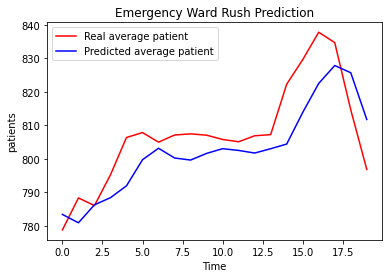

In [34]:
plt.plot(real_average_patient, color = 'red', label = 'Real average patient')
plt.plot(predicted_average_patient, color = 'blue', label = 'Predicted average patient')
plt.title('Emergency Ward Rush Prediction')
plt.xlabel('Time')
plt.ylabel('patients')
plt.legend()
plt.show()